In [53]:
import os
import pickle
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [54]:
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200

TARGET_WIDTH = 320
TARGET_HEIGHT = 80
PADDING = 5

MODEL_NAME = 'svm_model.pkl'
DATASET_PATH = r'./images/'

In [55]:
def load_model(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [56]:
def segment_image(image):
    original_image = cv2.resize(image, (TARGET_WIDTH, TARGET_HEIGHT))
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    cv2.threshold(image, 127, 255, cv2.THRESH_BINARY, image)
    image = cv2.bitwise_not(image)
    
    image = cv2.dilate(image, np.ones((1, 1), np.uint8), iterations=1)
    
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    split_images = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)

        if hierarchy[0][idx][3] != None:
            
            if w < 10 and h < 10:
                continue
            
            start_x = np.max([0, x - PADDING])
            start_y = np.max([0, y - PADDING])
            
            end_x = np.min([TARGET_WIDTH, x + w + PADDING])
            end_y = np.min([TARGET_HEIGHT, y + h + PADDING])
            
            split_images.append(image[start_y:end_y, start_x:end_x])
                
    return split_images

In [57]:
def preprocess_character(image):
    image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
    # image = image.flatten()
    return image

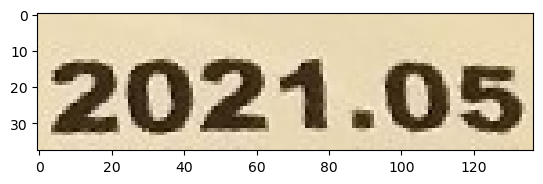

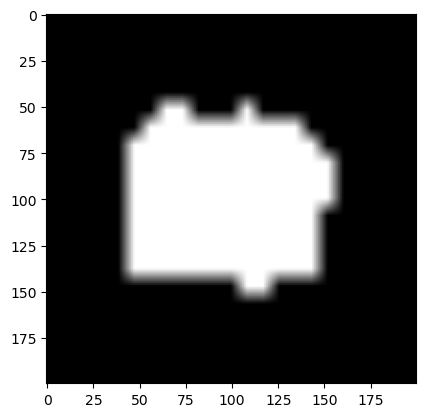

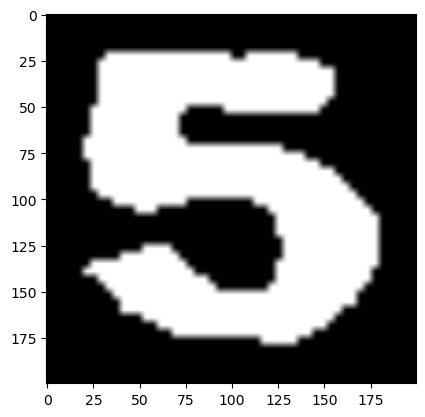

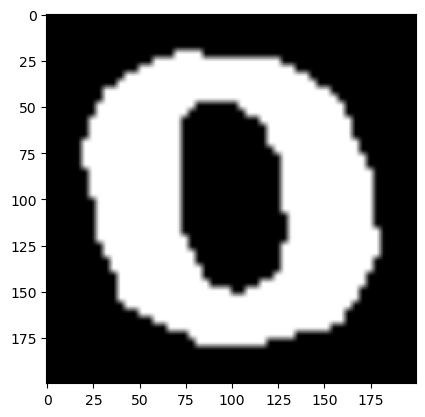

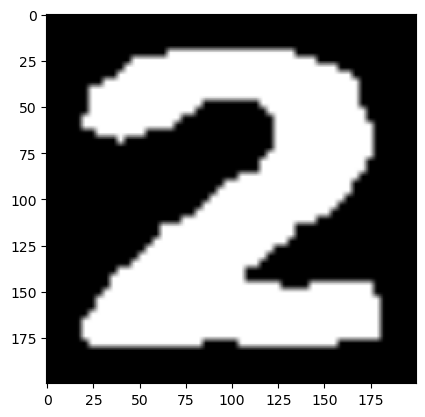

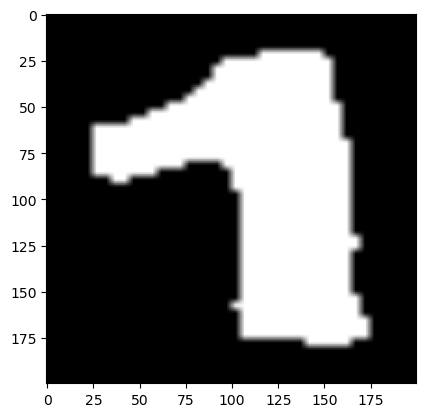

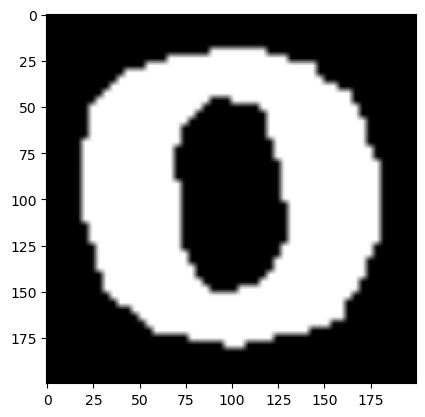

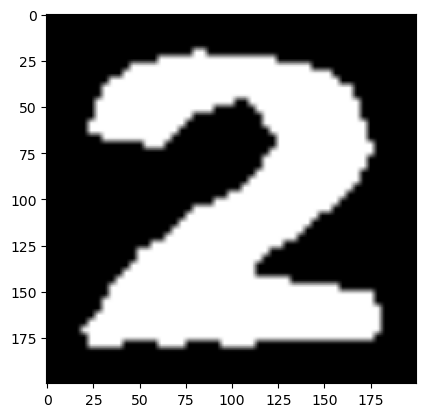

ValueError: Found array with dim 3. SVC expected <= 2.

In [59]:
images = os.listdir(DATASET_PATH)

model = load_model(MODEL_NAME)

random.shuffle(images)

for image_name in images[:1]:
    image_path = os.path.join(DATASET_PATH, image_name)
    
    original_image = cv2.imread(image_path)
    
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    characters = segment_image(original_image)
    
    characters = [preprocess_character(c) for c in characters]
    
    for idx, character in enumerate(characters):
        plt.imshow(cv2.cvtColor(character, cv2.COLOR_BGR2RGB))
        plt.show()
    
    prediction = model.predict(characters)
    
    plt.imshow(cv2.cvtColor(characters[0], cv2.COLOR_BGR2RGB))
    plt.show()
    
    